In [2]:
### 3 Classes!
import requests
from datetime import datetime as time
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

class DataBase:
    """
    This parent class takes the 'BoxOffice 90's - 2020' Dataset archived
    inside a .csv file, and clean it using Pandas! Then returns the Data 
    Frame assining it to the object 'self.clean_DataSet' to be used by
    the child classes!
    """
    """
    When we need to create objects refering to dates such 1990, we will
    use '90' instead, '70', '60' and so on. If you see '90_20' that can
    be seen as 'from the 90s until 2020'. The past should always come
    first! There is no 'from the 1990 until 1950', only 1950 until 1990!
    --> 'BO' and 'bo' stands for BoxOffice! 
    --> 'bo_90_20' stands for: BoxOffices from the 90s until 2020
    --> TMDb stands for The Movie DataBase.org
    --> IMDb stands for the famous IMDb
    --> BOMDb stands for BoxOffice Mojo DataBase
    """
    """
    For now, our app relys on this single dataset ('BoxOffice 90's - 2020') 
    but in the future it will have methods to request data from APIs,
    and methods to mix the requested data with all collected DataFrames 
    in one single obj 'self.clean_DataSet' that is already in use.
    """
    """
    ## Commented Methods ## are there to be pseudo-codes for future updates!
    """
    def __init__(self):
        # to be used if we need to create our own dataframe .csv file!
        self.file_path = ''
        # The clean DataSet that will be used by all users iteration!
        self.clean_DataSet = None
        # When we have to store Data Frames made by collecting info from
        # the following websites APIs.
        self.TMDb = None
        self.IMDb = None
        self.BOMDb = None
        
        # The BoxOffice Dataset from the 90's until April 2020, 
        # WITH release date!
        self.__bo_90_20 = 'dataset_mojo_budget_update_from_1990_until_04_20.csv'
        # The BoxOffice Dataset from all years until 2019,
        # WITHOUT release date!
        self.__bo_all_19 = 'datasets_boxoffice_alltime_until_august_2019.csv'

    # # def __TMDb_cleaning(self):
    # #     requests TMDb API
    # #     Pandas
    # #     Data Frame
    # #     pass

    # # def __IMDb_cleaning(self):
    # #     Requests API
    # #     Pandas
    # #     Data Frame
    # #     pass

    # # def __BOMDb_cleaning(self):
    # #     Requests API
    # #     Pandas
    # #     Data Frame
    # #     pass

    def BO_DS_cleaning(self):
        """
        This method clean the local stored .csv file that holds the
        'BoxOffice 90's - 2020' data, using Pandas, then return a single
        Data Frame inside the object 'self.clean_DataSet' to be used by
        child Classes!
        """
        bo_df = pd.read_csv(self.__bo_90_20)
        bo_df.drop(labels = [
            'trivia','mpaa','run_time','distributor','director',
            'composer','cinematographer','writer','main_actor_1',
            'main_actor_2','main_actor_3','main_actor_4','producer','html'
            ], axis='columns', inplace=True)
        # print('\n')
        # print('raw dataframe')
        # print(bo_df.head(5))
        # print('\n')
        # print('clean dataframe')
        
        bo_df['date'] = bo_df['year'].astype(str) + ' ' + bo_df['release_date']
        cols = bo_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        bo_df = bo_df[cols]
        bo_df['budget'] = bo_df['budget']/1000000
        bo_df['date'] = pd.to_datetime(bo_df['date'])
        bo_df.drop(labels = ['year','release_date'], axis='columns', inplace=True)
        # print(bo_df.head(5))
        # print('\n')
        #print(bo_df.tail(5))
        self.clean_DataSet = bo_df
        return self.clean_DataSet

    # # def __DataSet_generator(self):
    # #     if Public TMDb, IMDb and BOMDb exists:
    # #         if Day Date == Today:
    # #             Pandas
    # #             Data Set
    # #     else:
    # #         Call __private_method_TMDb_cleaning.requests()
    # #         Pandas
    # #         DataSet
    # #     pass

    # #private = property(__BOMDb_cleaning)


In [4]:
a = DataBase()

In [5]:
a.BO_DS_cleaning()

,date,movie_id,title,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,1990-05-25,tt0099088,Back to the Future Part III,40.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,1990-12-22,tt0099165,The Bonfire of the Vanities,47.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,1990-11-09,tt0099348,Dances with Wolves,22.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,1990-06-15,tt0099422,Dick Tracy,47.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,1990-07-06,tt0099423,Die Hard 2,70.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3238,2019-07-03,tt8772262,Midsommar,9.0,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,2019-11-21,tt8946378,Knives Out,40.0,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,2019-03-29,tt9024106,Unplanned,6.0,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,2019-11-07,tt9134216,Playing with Fire,29.9,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN


In [6]:
df = a.clean_DataSet

In [7]:
df

,date,movie_id,title,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,1990-05-25,tt0099088,Back to the Future Part III,40.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,1990-12-22,tt0099165,The Bonfire of the Vanities,47.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,1990-11-09,tt0099348,Dances with Wolves,22.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,1990-06-15,tt0099422,Dick Tracy,47.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,1990-07-06,tt0099423,Die Hard 2,70.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3238,2019-07-03,tt8772262,Midsommar,9.0,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,2019-11-21,tt8946378,Knives Out,40.0,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,2019-03-29,tt9024106,Unplanned,6.0,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,2019-11-07,tt9134216,Playing with Fire,29.9,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN


In [8]:
df.head()

,date,movie_id,title,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,1990-05-25,tt0099088,Back to the Future Part III,40.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,1990-12-22,tt0099165,The Bonfire of the Vanities,47.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,1990-11-09,tt0099348,Dances with Wolves,22.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,1990-06-15,tt0099422,Dick Tracy,47.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,1990-07-06,tt0099423,Die Hard 2,70.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN


In [30]:
osc = df['genre_1'].value_counts()

In [34]:
df_1 = osc.to_frame()

In [37]:
df_1

,genre_1
Action,927
Comedy,867
Drama,513
Adventure,313
Crime,204
Biography,181
Horror,162
Animation,29
Documentary,18
Fantasy,10


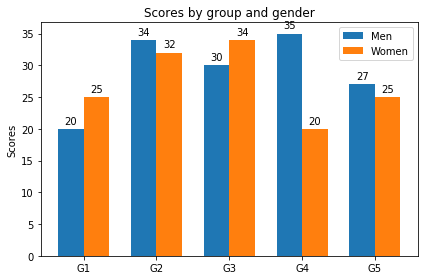

In [43]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(df_1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [58]:
df_2 = df_1.set_index('genre_1')
gen_value_list = df_2.index.tolist()
gen_list = df_1.index.tolist()

In [60]:
gen_value_list

[927, 867, 513, 313, 204, 181, 162, 29, 18, 10, 9, 3, 3, 3, 1]

In [52]:
df_2 = df_1.set_index('genre_1')

In [64]:
gen_list

['Action',
 'Comedy',
 'Drama',
 'Adventure',
 'Crime',
 'Biography',
 'Horror',
 'Animation',
 'Documentary',
 'Fantasy',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Family',
 'Music']

In [62]:
gen_value_list


[927, 867, 513, 313, 204, 181, 162, 29, 18, 10, 9, 3, 3, 3, 1]

TypeError: unsupported operand type(s) for -: 'list' and 'int'

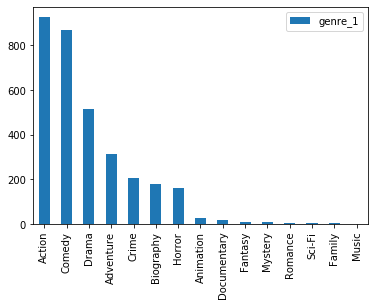

In [73]:
df_1.plot(kind='bar')

In [78]:
patati = df['date'].value_counts()

In [80]:
patati

1998-12-25    7
2001-10-26    6
1999-10-01    6
2002-10-25    6
2002-10-11    6
             ..
1999-12-08    1
2004-07-02    1
1993-09-17    1
2017-03-23    1
2017-06-28    1
Name: date, Length: 2107, dtype: int64

In [124]:
patati = df['budget'].value_counts()

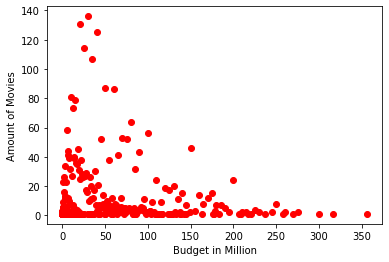

In [125]:
plt.plot(patati, 'ro')
plt.ylabel('Amount of Movies')
plt.xlabel('Budget in Million')
plt.show()

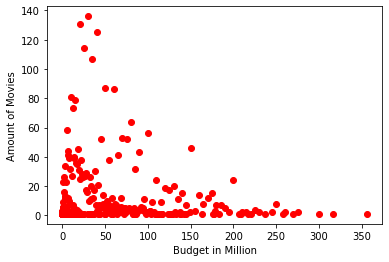

In [126]:
plt.plot(patati, 'ro')
plt.ylabel('Amount of Movies')
plt.xlabel('Budget in Million')

plt.show()


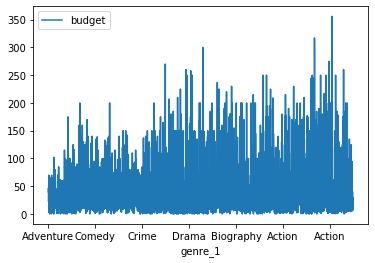

In [127]:
df.plot(x='genre_1', y='budget')

In [128]:
genres = (df.genre_1.str.split('|', expand=True)
            .stack()
            .to_frame(name='genre'))


genres.index = genres.index.droplevel(1)

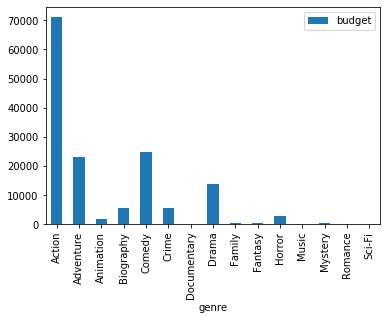

In [129]:
(genres.join(df['budget'])
       .groupby('genre')
       .sum()
       .plot(kind='bar'))

In [3]:
b = DataBase()

In [4]:
b.BO_DS_cleaning()

,date,movie_id,title,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,1990-05-25,tt0099088,Back to the Future Part III,40.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,1990-12-22,tt0099165,The Bonfire of the Vanities,47.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,1990-11-09,tt0099348,Dances with Wolves,22.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,1990-06-15,tt0099422,Dick Tracy,47.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,1990-07-06,tt0099423,Die Hard 2,70.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3238,2019-07-03,tt8772262,Midsommar,9.0,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,2019-11-21,tt8946378,Knives Out,40.0,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,2019-03-29,tt9024106,Unplanned,6.0,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,2019-11-07,tt9134216,Playing with Fire,29.9,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN
